In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import scipy as sc 
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
col_names = ["HCHO reading", "Location", "Current Date", "Next Date"]
col_mat_nuw_data = pd.read_csv("../Dataset/col_mat_nuw_output.csv", names=col_names, 
                               parse_dates=["Current Date", "Next Date"]) 
mon_kur_jaf_data = pd.read_csv("../Dataset/mon_kur_jaf_output.csv", names=col_names, 
                               parse_dates=["Current Date", "Next Date"])
kan_data = pd.read_csv("../Dataset/kan_output.csv", names=col_names, 
                       parse_dates=["Current Date", "Next Date"])

In [4]:
col_mat_nuw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO reading  3059 non-null   float64       
 1   Location      5478 non-null   object        
 2   Current Date  5478 non-null   datetime64[ns]
 3   Next Date     5478 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 171.3+ KB


In [5]:
col_mat_nuw_data.isnull().sum()

HCHO reading    2419
Location           0
Current Date       0
Next Date          0
dtype: int64

In [6]:
col_mat_nuw_data.head()

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [7]:
# Each area has equal amount of data
col_mat_nuw_data["Location"].value_counts()

Location
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Name: count, dtype: int64

In [8]:
# Check whether all the measurements are taken 
reading_gap = col_mat_nuw_data["Next Date"] - col_mat_nuw_data["Current Date"]
reading_gap.unique() 

<TimedeltaArray>
['1 days']
Length: 1, dtype: timedelta64[ns]

In [9]:
colomboProperData = col_mat_nuw_data[col_mat_nuw_data["Location"] == "Colombo Proper"]
MataraDeniyayaData = col_mat_nuw_data[col_mat_nuw_data["Location"] == "Deniyaya, Matara"]
NuwaraEliyaData = col_mat_nuw_data[col_mat_nuw_data["Location"] == "Nuwara Eliya Proper"]

In [10]:
colomboProperData.shape, MataraDeniyayaData.shape, NuwaraEliyaData.shape

((1826, 4), (1826, 4), (1826, 4))

In [11]:
colomboProperData.head()

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [12]:
MataraDeniyayaData.head()

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06


In [13]:
NuwaraEliyaData.head()

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06


In [14]:
# Check for Monaragala Kurunegala and Jaffna Data
mon_kur_jaf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO reading  3826 non-null   float64       
 1   Location      5478 non-null   object        
 2   Current Date  5478 non-null   datetime64[ns]
 3   Next Date     5478 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 171.3+ KB


In [15]:
mon_kur_jaf_data.isnull().sum()

HCHO reading    1652
Location           0
Current Date       0
Next Date          0
dtype: int64

In [16]:
mon_kur_jaf_data.head()

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06


In [17]:
# Each area has equal amount of data
mon_kur_jaf_data["Location"].value_counts() 

Location
Bibile, Monaragala    1826
Kurunegala Proper     1826
Jaffna Proper         1826
Name: count, dtype: int64

In [18]:
# Check whether all the measurements are taken slycontinou
reading_gap =  mon_kur_jaf_data["Next Date"] - mon_kur_jaf_data["Current Date"]
reading_gap.unique() 

<TimedeltaArray>
['1 days']
Length: 1, dtype: timedelta64[ns]

In [19]:
bibileMonaragalaData = mon_kur_jaf_data[mon_kur_jaf_data["Location"] == "Bibile, Monaragala"]
kurunegalaProperData = mon_kur_jaf_data[mon_kur_jaf_data["Location"] == "Kurunegala Proper"]
jaffnaData = mon_kur_jaf_data[mon_kur_jaf_data["Location"] == "Jaffna Proper"]

In [20]:
bibileMonaragalaData.shape, kurunegalaProperData.shape, jaffnaData.shape

((1826, 4), (1826, 4), (1826, 4))

In [21]:
bibileMonaragalaData.head()

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06


In [22]:
kurunegalaProperData.head()

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06


In [23]:
jaffnaData.head()

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06


In [24]:
# Check kandy data
kan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO reading  1033 non-null   float64       
 1   Location      1826 non-null   object        
 2   Current Date  1826 non-null   datetime64[ns]
 3   Next Date     1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 57.2+ KB


In [25]:
kan_data.isnull().sum()

HCHO reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64

In [26]:
kandyData = kan_data

In [27]:
kandyData.head()

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06


# Anayse Colombo Proper dataset

In [28]:
colomboProperData.isnull().sum()

HCHO reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64

In [29]:
colomboProperData.head()

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [30]:
# Readings taken in colombo area in 2019 to 2023
colomboProperData["Current Date"].dt.year.value_counts()

Current Date
2020    366
2019    365
2021    365
2022    365
2023    365
Name: count, dtype: int64

In [31]:
# Time range of data taken
colomboProperData["Current Date"].min(), colomboProperData["Next Date"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

In [32]:
colomboProperDataVisualize = colomboProperData

In [90]:
# Plot the HCHO emission in each year in colombo prop
fig = px.line(colomboProperDataVisualize , x="Next Date", y="HCHO reading", title="HCHO Reading in colombo over 2019 to 2023") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

# Things discovered from this dataset
## There is a seasanolity of HCHO emiisions, in the starting months and ending months there is a high HCHO emission in 
## Colombo Proper Area
## Should handle the missing values

In [34]:
colomboProperData.set_index("Current Date", inplace=True)

In [35]:
colomboProperData = colomboProperData.copy()
colomboProperDataNa = colomboProperData.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

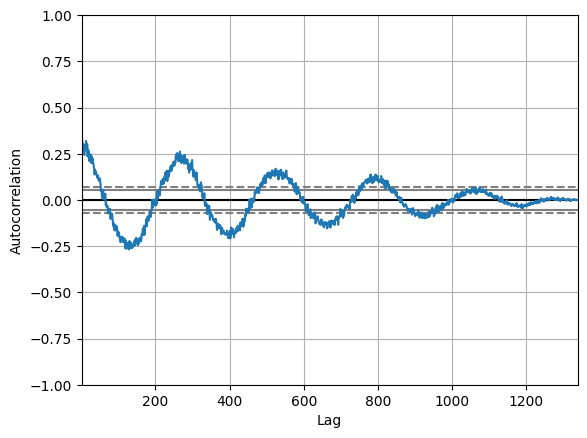

In [36]:
pd.plotting.autocorrelation_plot(colomboProperDataNa["2019":"2023"]["HCHO reading"]) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

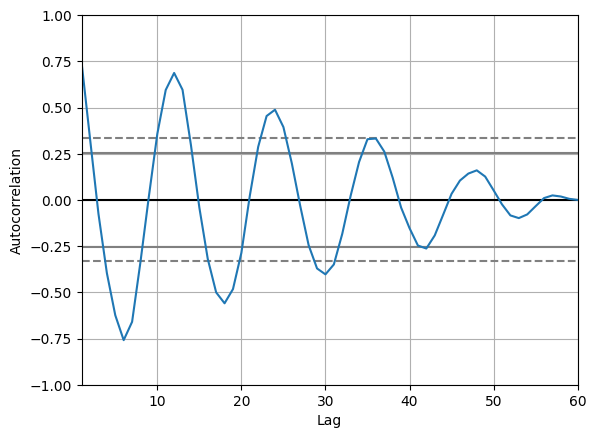

In [37]:
pd.plotting.autocorrelation_plot(colomboProperDataNa["2019":"2023"]["HCHO reading"].resample("1m").mean())
# It shows there is a peak in each 12 month period

In [38]:
check_colombo = colomboProperData
check_colombo.head(30)

,HCHO reading,Location,Next Date
Current Date,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02
2019-01-02,0.000263,Colombo Proper,2019-01-03
2019-01-03,0.000099,Colombo Proper,2019-01-04
2019-01-04,0.000210,Colombo Proper,2019-01-05
2019-01-05,0.000179,Colombo Proper,2019-01-06
2019-01-06,0.000108,Colombo Proper,2019-01-07
2019-01-07,0.000393,Colombo Proper,2019-01-08
2019-01-08,0.000092,Colombo Proper,2019-01-09
2019-01-09,0.000121,Colombo Proper,2019-01-10


In [39]:
check_colombo["forward_fill"] = check_colombo["HCHO reading"].fillna(method="ffill")

In [40]:
check_colombo.head(30)

,HCHO reading,Location,Next Date,forward_fill
Current Date,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,0.000197
2019-01-02,0.000263,Colombo Proper,2019-01-03,0.000263
2019-01-03,0.000099,Colombo Proper,2019-01-04,0.000099
2019-01-04,0.000210,Colombo Proper,2019-01-05,0.000210
2019-01-05,0.000179,Colombo Proper,2019-01-06,0.000179
2019-01-06,0.000108,Colombo Proper,2019-01-07,0.000108
2019-01-07,0.000393,Colombo Proper,2019-01-08,0.000393
2019-01-08,0.000092,Colombo Proper,2019-01-09,0.000092
2019-01-09,0.000121,Colombo Proper,2019-01-10,0.000121


In [41]:
check_colombo['HCHO rolling'] = check_colombo['HCHO reading'].fillna(check_colombo['HCHO reading'].rolling(3, min_periods=1).mean())
check_colombo['HCHO rolling'] = check_colombo['HCHO reading'].fillna(check_colombo['HCHO reading'].rolling(5, min_periods=1).mean())
check_colombo['HCHO rolling'] = check_colombo['HCHO reading'].fillna(check_colombo['HCHO reading'].rolling(7, min_periods=1).mean())
check_colombo['HCHO rolling'] = check_colombo['HCHO reading'].fillna(check_colombo['HCHO reading'].rolling(8, min_periods=1).mean())

In [42]:
check_colombo.head(50)

,HCHO reading,Location,Next Date,forward_fill,HCHO rolling
Current Date,,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,0.000197,0.000197
2019-01-02,0.000263,Colombo Proper,2019-01-03,0.000263,0.000263
2019-01-03,0.000099,Colombo Proper,2019-01-04,0.000099,0.000099
2019-01-04,0.000210,Colombo Proper,2019-01-05,0.000210,0.000210
2019-01-05,0.000179,Colombo Proper,2019-01-06,0.000179,0.000179
2019-01-06,0.000108,Colombo Proper,2019-01-07,0.000108,0.000108
2019-01-07,0.000393,Colombo Proper,2019-01-08,0.000393,0.000393
2019-01-08,0.000092,Colombo Proper,2019-01-09,0.000092,0.000092
2019-01-09,0.000121,Colombo Proper,2019-01-10,0.000121,0.000121


In [43]:
# Plot the HCHO emission in each year in colombo prop
fig = px.line(colomboProperData , x="Next Date", y="HCHO reading", title="HCHO Reading in colombo over 2019 to 2023") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [44]:
# Plot the HCHO emission in each year in colombo prop
fig = px.line(check_colombo , x="Next Date", y="HCHO rolling", title="HCHO Reading in colombo over 2019 to 2023 after filling") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [45]:
check_colombo["HCHO rolling"].isnull().sum()

0

In [46]:
colomboProperData["HCHO reading"].head()

Current Date
2019-01-01    0.000197
2019-01-02    0.000263
2019-01-03    0.000099
2019-01-04    0.000210
2019-01-05    0.000179
Name: HCHO reading, dtype: float64

In [47]:
colomboProperData["HCHO reading"] = check_colombo["HCHO rolling"]

In [48]:
colomboProperData.head()

,HCHO reading,Location,Next Date,forward_fill,HCHO rolling
Current Date,,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,0.000197,0.000197
2019-01-02,0.000263,Colombo Proper,2019-01-03,0.000263,0.000263
2019-01-03,0.000099,Colombo Proper,2019-01-04,0.000099,0.000099
2019-01-04,0.000210,Colombo Proper,2019-01-05,0.000210,0.000210
2019-01-05,0.000179,Colombo Proper,2019-01-06,0.000179,0.000179


In [49]:
colomboProperData.drop(columns=["HCHO rolling"], inplace=True) 

# Analyse Deniyaya Matara Data Set

In [50]:
MataraDeniyayaData.isnull().sum()

HCHO reading    847
Location          0
Current Date      0
Next Date         0
dtype: int64

In [51]:
MataraDeniyayaData.head()

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06


In [52]:
# Check whether all 5 years data availble
MataraDeniyayaData["Current Date"].dt.year.value_counts()

Current Date
2020    366
2019    365
2021    365
2022    365
2023    365
Name: count, dtype: int64

In [53]:
# Time range of data taken
MataraDeniyayaData["Current Date"].min(), MataraDeniyayaData["Next Date"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

In [54]:
# Plot the HCHO emission in each year in Matara Deniyaya
fig = px.line(MataraDeniyayaData , x="Current Date", y="HCHO reading", title="HCHO Reading in Deniyaya Matara over 2019 to 2023") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [55]:
MataraDeniyayaData.set_index("Current Date", inplace=True)

In [56]:
MataraDeniyayaData = MataraDeniyayaData.copy()
MataraDeniyayaDataNa = MataraDeniyayaData.dropna()

In [57]:
MataraDeniyayaData.isnull().sum()

HCHO reading    847
Location          0
Next Date         0
dtype: int64

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

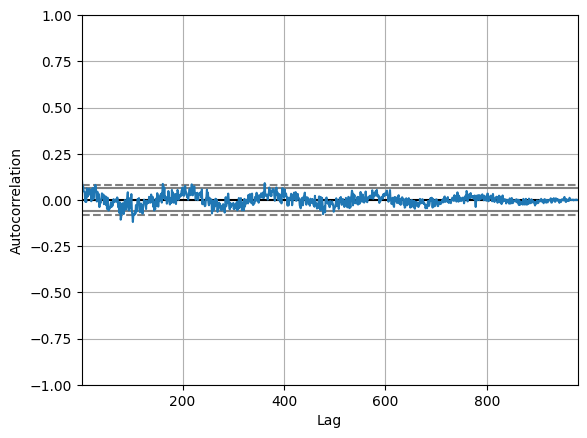

In [58]:
# There is a pattern of HCHO emission without huge deviation
pd.plotting.autocorrelation_plot(MataraDeniyayaDataNa["2019":"2023"]["HCHO reading"]) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

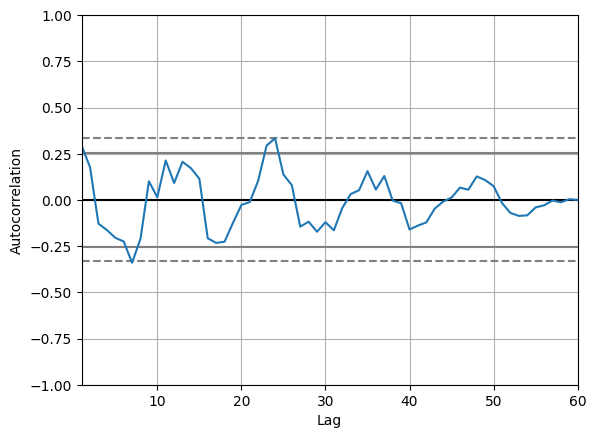

In [59]:
pd.plotting.autocorrelation_plot(MataraDeniyayaDataNa["2019":"2023"]["HCHO reading"].resample("1m").mean()) 
# This shows at the end an begining of each year HCHO level comes to peek in deniyaya and Matara

<Axes: xlabel='y(t)', ylabel='y(t + 365)'>

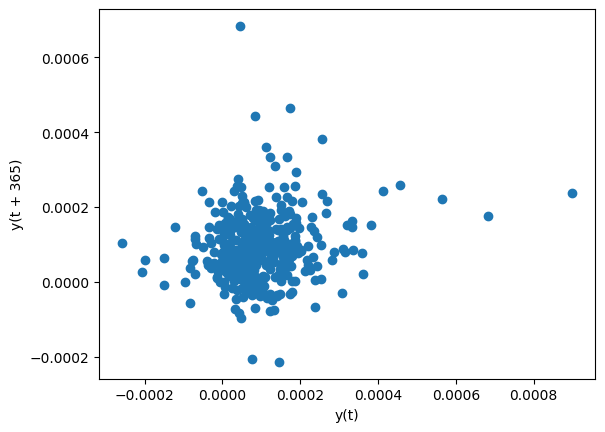

In [60]:
# It shows there is a tiny correaltion of Matara Deniyaya CHCHO emission rates in years (it is a random plot)
pd.plotting.lag_plot(MataraDeniyayaData["2019":"2023"]["HCHO reading"], lag=365)

In [61]:
checkMatara = MataraDeniyayaData.copy()

In [62]:
checkMatara.head()

,HCHO reading,Location,Next Date
Current Date,,,
2019-01-01,NaN,"Deniyaya, Matara",2019-01-02
2019-01-02,0.000006,"Deniyaya, Matara",2019-01-03
2019-01-03,0.000236,"Deniyaya, Matara",2019-01-04
2019-01-04,0.000064,"Deniyaya, Matara",2019-01-05
2019-01-05,0.000053,"Deniyaya, Matara",2019-01-06


In [63]:
checkMatara["forward_fill"] = checkMatara["HCHO reading"].fillna(method="ffill")
checkMatara

,HCHO reading,Location,Next Date,forward_fill
Current Date,,,,
2019-01-01,NaN,"Deniyaya, Matara",2019-01-02,NaN
2019-01-02,0.000006,"Deniyaya, Matara",2019-01-03,0.000006
2019-01-03,0.000236,"Deniyaya, Matara",2019-01-04,0.000236
2019-01-04,0.000064,"Deniyaya, Matara",2019-01-05,0.000064
2019-01-05,0.000053,"Deniyaya, Matara",2019-01-06,0.000053
...,...,...,...,...
2023-12-27,0.000228,"Deniyaya, Matara",2023-12-28,0.000228
2023-12-28,NaN,"Deniyaya, Matara",2023-12-29,0.000228
2023-12-29,NaN,"Deniyaya, Matara",2023-12-30,0.000228


In [64]:
import pandas as pd

window_sizes = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

for window_size in window_sizes:
    checkMatara['HCHO rolling'] = checkMatara['HCHO reading'].fillna(checkMatara['HCHO reading'].rolling(window_size, min_periods=1).mean())

checkMatara['HCHO rolling'] = checkMatara['HCHO rolling'].fillna(method="bfill")

In [65]:
checkMatara.isnull().sum() # first data point of forward will has not filled

HCHO reading    847
Location          0
Next Date         0
forward_fill      1
HCHO rolling      0
dtype: int64

In [66]:
# Plot the HCHO emission in each year in Matara Deniyaya
fig = px.line(MataraDeniyayaData , x="Next Date", y="HCHO reading", title="HCHO Reading in Deniyaya Matara over 2019 to 2023 after filling") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [67]:
# Plot the HCHO emission in each year in Matara Deniyaya
fig = px.line(checkMatara , x="Next Date", y="HCHO rolling", title="HCHO Reading in Deniyaya Matara over 2019 to 2023 after filling") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [68]:
MataraDeniyayaData["HCHO reading"] = checkMatara["HCHO rolling"]

In [69]:
MataraDeniyayaData.isnull().sum()

HCHO reading    0
Location        0
Next Date       0
dtype: int64

# Analyse Nuwara Eliya Data Set

In [70]:
NuwaraEliyaData.isnull().sum()

HCHO reading    1085
Location           0
Current Date       0
Next Date          0
dtype: int64

In [71]:
NuwaraEliyaData.head()

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06


In [72]:
# Check whether all 5 years data availble
NuwaraEliyaData["Current Date"].dt.year.value_counts()

Current Date
2020    366
2019    365
2021    365
2022    365
2023    365
Name: count, dtype: int64

In [73]:
# Time range of data taken
NuwaraEliyaData["Current Date"].min(), NuwaraEliyaData["Next Date"].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))

In [74]:
# Plot the HCHO emission in each year in Nuwara Eliya
fig = px.line(NuwaraEliyaData , x="Current Date", y="HCHO reading", title="HCHO Reading in Nuwara Eliya over 2019 to 2023") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [75]:
NuwaraEliyaData.set_index("Current Date", inplace=True)

In [76]:
NuwaraEliyaData.head()

,HCHO reading,Location,Next Date
Current Date,,,
2019-01-01,NaN,Nuwara Eliya Proper,2019-01-02
2019-01-02,NaN,Nuwara Eliya Proper,2019-01-03
2019-01-03,0.000191,Nuwara Eliya Proper,2019-01-04
2019-01-04,0.000051,Nuwara Eliya Proper,2019-01-05
2019-01-05,0.000065,Nuwara Eliya Proper,2019-01-06


In [77]:
NuwaraEliyaData = NuwaraEliyaData.copy()
NuwaraEliyaDataNa = NuwaraEliyaData.dropna()

In [78]:
NuwaraEliyaData.isnull().sum()

HCHO reading    1085
Location           0
Next Date          0
dtype: int64

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

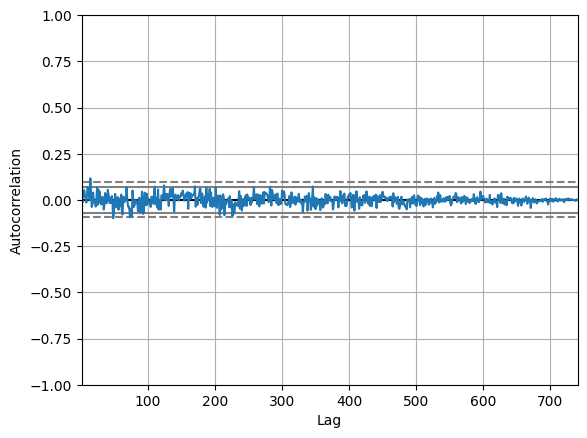

In [79]:
# The pattern is buit difficult to understand in this overview
pd.plotting.autocorrelation_plot(NuwaraEliyaDataNa["2019":"2023"]["HCHO reading"]) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

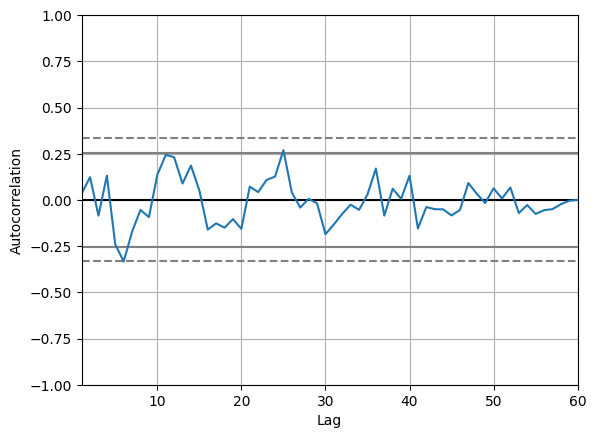

In [80]:
pd.plotting.autocorrelation_plot(NuwaraEliyaDataNa["2019":"2023"]["HCHO reading"].resample("1m").mean()) 
# It shows there was pattern between the HCHO emission rate in first two years in nuwara eliya,
#after that difficult to odentify it

<Axes: xlabel='y(t)', ylabel='y(t + 365)'>

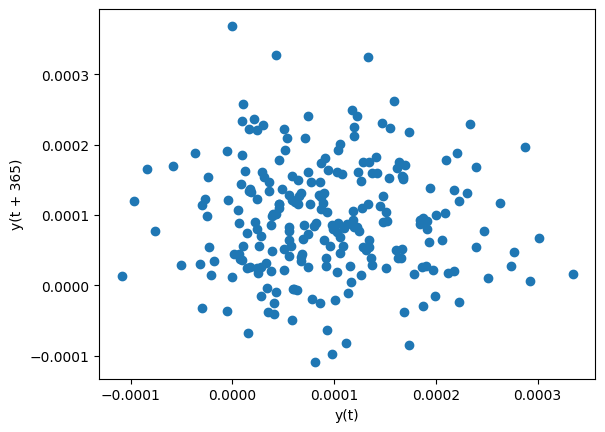

In [81]:
# It shows there is a no much correaltion of Nuwara Eliya CHCHO emission rates in years (no auto co relation)
pd.plotting.lag_plot(NuwaraEliyaData["2019":"2023"]["HCHO reading"], lag=365)

In [82]:
checkNuwaraEliya = NuwaraEliyaData.copy()

In [83]:
checkNuwaraEliya.head()

,HCHO reading,Location,Next Date
Current Date,,,
2019-01-01,NaN,Nuwara Eliya Proper,2019-01-02
2019-01-02,NaN,Nuwara Eliya Proper,2019-01-03
2019-01-03,0.000191,Nuwara Eliya Proper,2019-01-04
2019-01-04,0.000051,Nuwara Eliya Proper,2019-01-05
2019-01-05,0.000065,Nuwara Eliya Proper,2019-01-06


In [84]:
checkNuwaraEliya["forward_fill"] = checkNuwaraEliya["HCHO reading"].fillna(method="ffill")
checkNuwaraEliya.head()

,HCHO reading,Location,Next Date,forward_fill
Current Date,,,,
2019-01-01,NaN,Nuwara Eliya Proper,2019-01-02,NaN
2019-01-02,NaN,Nuwara Eliya Proper,2019-01-03,NaN
2019-01-03,0.000191,Nuwara Eliya Proper,2019-01-04,0.000191
2019-01-04,0.000051,Nuwara Eliya Proper,2019-01-05,0.000051
2019-01-05,0.000065,Nuwara Eliya Proper,2019-01-06,0.000065


In [85]:
import pandas as pd

window_sizes = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

for window_size in window_sizes:
    checkNuwaraEliya['HCHO rolling'] = checkNuwaraEliya['HCHO reading'].fillna(checkNuwaraEliya['HCHO reading'].rolling(window_size, min_periods=1).mean())
checkNuwaraEliya['HCHO rolling'] = checkNuwaraEliya['HCHO rolling'].fillna(method="bfill")

In [86]:
checkNuwaraEliya.isnull().sum() 

HCHO reading    1085
Location           0
Next Date          0
forward_fill       2
HCHO rolling       0
dtype: int64

In [87]:
checkNuwaraEliya.head(30)

,HCHO reading,Location,Next Date,forward_fill,HCHO rolling
Current Date,,,,,
2019-01-01,NaN,Nuwara Eliya Proper,2019-01-02,NaN,0.000191
2019-01-02,NaN,Nuwara Eliya Proper,2019-01-03,NaN,0.000191
2019-01-03,0.000191,Nuwara Eliya Proper,2019-01-04,0.000191,0.000191
2019-01-04,0.000051,Nuwara Eliya Proper,2019-01-05,0.000051,0.000051
2019-01-05,0.000065,Nuwara Eliya Proper,2019-01-06,0.000065,0.000065
2019-01-06,0.000090,Nuwara Eliya Proper,2019-01-07,0.000090,0.000090
2019-01-07,0.000041,Nuwara Eliya Proper,2019-01-08,0.000041,0.000041
2019-01-08,NaN,Nuwara Eliya Proper,2019-01-09,0.000041,0.000087
2019-01-09,NaN,Nuwara Eliya Proper,2019-01-10,0.000041,0.000087


In [88]:
# Plot the HCHO emission in each year in Nuwara Eliya
fig = px.line(checkNuwaraEliya , x="Next Date", y="HCHO rolling", title="HCHO Reading in Nuwara Eliya over 2019 to 2023 after filling") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()

In [89]:
# Plot the HCHO emission in each year in Nuwara Eliya
fig = px.line(NuwaraEliyaData , x="Next Date", y="HCHO reading", title="HCHO Reading in Nuwara Eliya over 2019 to 2023") 
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"), 
            dict(count=2, label="2y", step="year", stepmode="backward"), 
            dict(count=3, label="3y", step="year", stepmode="backward"), 
            dict(count=4, label="4y", step="year", stepmode="backward"), 
            dict(count=5, label="5y", step="year", stepmode="backward"), 
        ])
    )
)

fig.show()